In [63]:
# Adapted from: https://kozodoi.me/blog/20210308/compute-image-stats


In [1]:
import glob
import os

import torch 
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
Image.MAX_IMAGE_PIXELS = None


class MillionAID(Dataset):
    def __init__(self, root, transforms=None):
        images = list(glob.glob(os.path.join(root, "test", "*", "*.jpg")))
        self.transform = transforms
        self.files = images

        print('Creating MillionAID dataset with {} examples'.format(len(self.files)))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        img_path = self.files[i]
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        return img


In [2]:
transformat = transforms.Compose([transforms.Resize((224, 224)), 
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean = (0, 0, 0), std  = (1, 1, 1))])

In [3]:
DATA_PATH = "../datasets/Million-AID1"
BATCH_SIZE = 8
NUM_WORKERS = 8

dataset_train = MillionAID(DATA_PATH, transforms=transformat)

data_loader = torch.utils.data.DataLoader(
        dataset_train, 
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=True)

Creating MillionAID dataset with 990848 examples


3


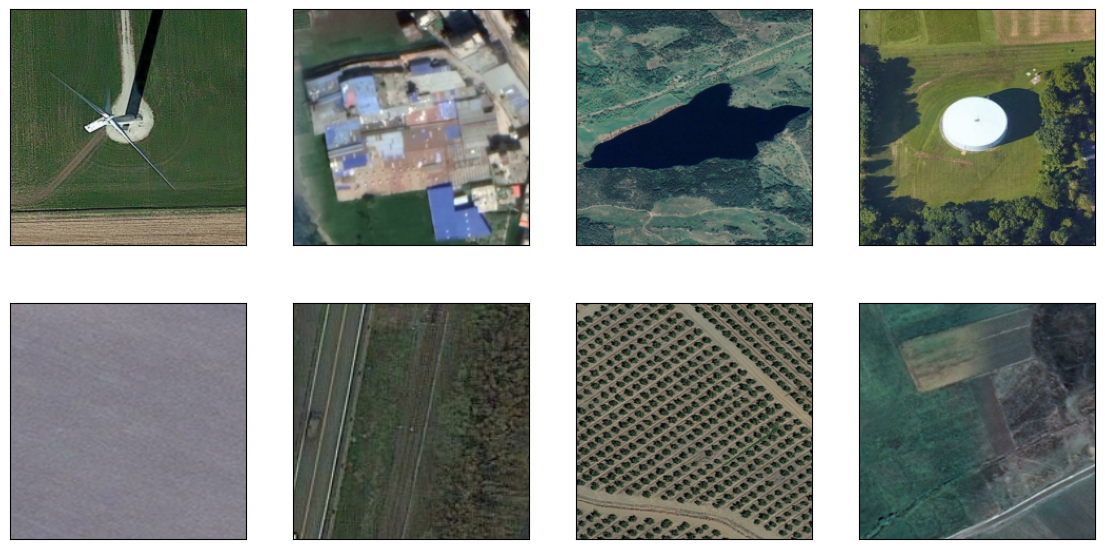

In [6]:
for batch_number, inputs in enumerate(data_loader):
    fig = plt.figure(figsize = (14, 7))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])     
        plt.imshow(inputs[i].numpy().transpose(1, 2, 0))
    break

In [7]:
mean_sum    = torch.tensor([0.0, 0.0, 0.0])
stddev_sum = torch.tensor([0.0, 0.0, 0.0])

for inputs in tqdm(data_loader):
    mean_sum    += inputs.sum(axis = [0, 2, 3])
    stddev_sum += (inputs ** 2).sum(axis = [0, 2, 3])

100%|██████████████████████████████████| 123856/123856 [14:35<00:00, 141.46it/s]


In [12]:
pixel_count = len(dataset_train.files) * 224 * 224
total_mean = psum / pixel_count
total_var  = (psum_sq / pixel_count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

print(f"Mean: {total_mean} and Standard Deviation: {total_std}")

Mean: tensor([0.3834, 0.3956, 0.3531]) and Standard Deviation: tensor([0.1969, 0.1771, 0.1742])
